In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from numpy import mean
from numpy import std

In [3]:
df = pd.read_csv('house_price.csv')

In [4]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [5]:
df.shape

(13200, 7)

In [6]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [7]:
min_tresh,max_tresh = df.price_per_sqft.quantile([0.001, 0.999])
min_tresh,max_tresh

(1366.184, 50959.36200000099)

In [8]:
df[df.price_per_sqft<min_tresh]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [9]:
df[df.price_per_sqft>max_tresh]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


In [10]:
df2 = df[(df.price_per_sqft<max_tresh) & (df.price_per_sqft>min_tresh)]
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [11]:
data_mean, data_std = mean(df2), std(df2)
print(data_std)

total_sqft         967.086999
bath                 1.336975
price              145.366529
bhk                  1.291081
price_per_sqft    4140.863507
dtype: float64


In [12]:
df2.shape

(13172, 7)

In [13]:
print('Mean:', np.mean(df2))
print('Standard Deviation:', np.std(df2))

Mean: total_sqft        1537.861049
bath                 2.690100
price              111.591865
bhk                  2.799651
price_per_sqft    6663.653735
dtype: float64
Standard Deviation: total_sqft         967.086999
bath                 1.336975
price              145.366529
bhk                  1.291081
price_per_sqft    4140.863507
dtype: float64


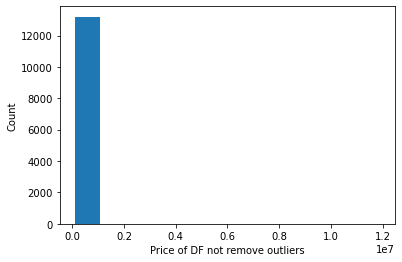

In [36]:
plt.hist(df.price_per_sqft,bins = 10, rwidth = 0.8)
plt.xlabel('Price of DF not remove outliers')
plt.ylabel('Count')
plt.show()

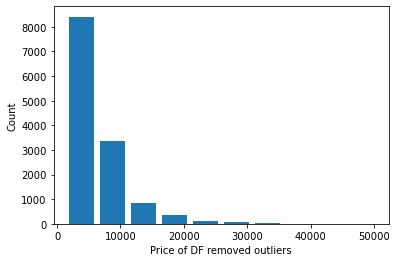

In [37]:
plt.hist(df2.price_per_sqft,bins = 10, rwidth = 0.8)
plt.xlabel('Price of DF removed outliers')
plt.ylabel('Count')
plt.show()

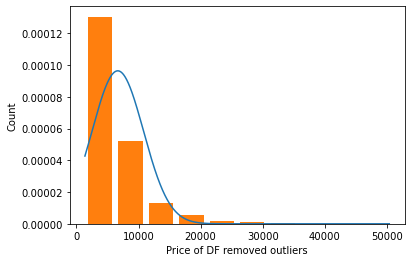

In [41]:
from scipy.stats import  norm
import numpy as np
rng= np.arange(df2.price_per_sqft.min(), df2.price_per_sqft.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df2.price_per_sqft.mean(),df2.price_per_sqft.std()))

plt.hist(df2.price_per_sqft,bins = 10, rwidth = 0.8,density = True)
plt.xlabel('Price of DF removed outliers')
plt.ylabel('Count')
plt.show()



In [42]:
upper = df2.price_per_sqft.mean()+ 3*df2.price_per_sqft.std()
upper

19086.715835719682

In [43]:
lower = df2.price_per_sqft.mean() - 3*df2.price_per_sqft.std()
lower

-5759.408365327943

In [44]:
df2[(df2.price_per_sqft<upper) | (df2.price_per_sqft>lower)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [46]:
df3 = df2[(df2.price_per_sqft<upper) | (df2.price_per_sqft>lower)]
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [48]:
df2.shape

(13172, 7)

In [47]:
df3.shape

(13172, 7)

In [51]:
df3['zscore'] = (df3.price_per_sqft - df3.price_per_sqft.mean()) / df3.price_per_sqft.std()
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [57]:
df3[df3.zscore >1]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181,2.781282
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571,1.668030
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250,2.314972
...,...,...,...,...,...,...,...,...
13176,Cox Town,2 BHK,1200.0,2.0,140.0,2,11666,1.207998
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666,2.415430


In [58]:
df3[df3.zscore < -1]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
20,Kengeri,1 BHK,600.0,1.0,15.00,1,2500,-1.005466
130,Electronic City,2 BHK,880.0,1.0,16.50,2,1875,-1.156395
169,Attibele,1 BHK,450.0,1.0,11.00,1,2444,-1.018989
247,Chandapura,2 BHK,800.0,1.0,20.00,2,2500,-1.005466
250,other,2 BHK,900.0,2.0,22.50,2,2500,-1.005466
...,...,...,...,...,...,...,...,...
12458,other,1 BHK,2559.0,1.0,55.00,1,2149,-1.090227
12463,Chandapura,1 BHK,410.0,1.0,10.00,1,2439,-1.020196
12532,Electronic City,2 BHK,1125.0,2.0,28.13,2,2500,-1.005466
12555,Kumaraswami Layout,2 BHK,1200.0,2.0,29.00,2,2416,-1.025750


In [62]:
df3[(df3.zscore < -1) | (df3.zscore >1)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181,2.781282
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500,-1.005466
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571,1.668030
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
...,...,...,...,...,...,...,...,...
13176,Cox Town,2 BHK,1200.0,2.0,140.0,2,11666,1.207998
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666,2.415430


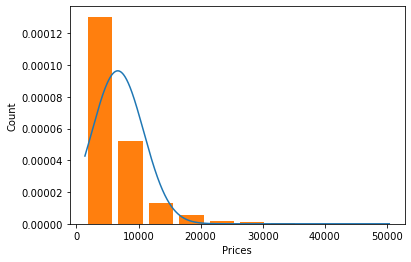

In [63]:
from scipy.stats import  norm
import numpy as np
rng= np.arange(df3.price_per_sqft.min(), df3.price_per_sqft.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

plt.hist(df3.price_per_sqft,bins = 10, rwidth = 0.8,density = True)
plt.xlabel('Prices')
plt.ylabel('Count')
plt.show()
